# Carga de datos

Este tutorial es una selección y adaptación al español del libro [Natural Language Processing with Python – Analyzing Text with the Natural Language Toolkit](https://www.nltk.org/book/).


La fuente de textos más importante es sin duda la Web. Es conveniente tener colecciones de texto existentes para explorar. Sin embargo, probablemente tengas en mente tus propias fuentes de texto y necesites aprender a acceder a ellas.

¿Cómo podemos escribir programas para acceder a texto desde archivos locales y desde la web, con el fin de disponer de una variedad ilimitada de material lingüístico?

## Acceso a texto desde la web y desde el disco

### Libros electrónicos

Puede que te interese analizar textos del Proyecto Gutenberg. Puedes explorar el catálogo de 25.000 libros en línea gratuitos en http://www.gutenberg.org/catalog/ y obtener una URL a un archivo de texto ASCII. 

Aunque el 90% de los textos del Proyecto Gutenberg están en inglés, incluye material en más de 50 idiomas, entre ellos catalán, chino, holandés, finlandés, francés, alemán, italiano, portugués y español (con más de 100 textos cada uno).

El número de texto 21282 es Tradiciones Peruanas, y podemos acceder a él de la siguiente manera:

In [15]:
from urllib.request import urlopen

url = "https://www.gutenberg.org/files/21282/21282-8.txt"
raw = urlopen(url).read().decode("ISO-8859-1")

In [16]:
raw

'The Project Gutenberg EBook of Tradiciones peruanas, by Ricardo Palma\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nalmost no restrictions whatsoever.  You may copy it, give it away or\r\nre-use it under the terms of the Project Gutenberg License included\r\nwith this eBook or online at www.gutenberg.org\r\n\r\n\r\nTitle: Tradiciones peruanas\r\n\r\nAuthor: Ricardo Palma\r\n\r\nRelease Date: May 4, 2007 [EBook #21282]\r\n\r\nLanguage: Spanish\r\n\r\nCharacter set encoding: ISO-8859-1\r\n\r\n*** START OF THIS PROJECT GUTENBERG EBOOK TRADICIONES PERUANAS ***\r\n\r\n\r\n\r\n\r\nProduced by Chuck Greif and the Online Distributed\r\nProofreading Team at http://www.pgdp.net\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\nRICARDO PALMA\r\n\r\nTRADICIONES PERUANAS\r\n\r\n\r\n\r\n\r\nINDICE\r\n\r\n\r\nLos duendes del Cuzco\r\nLos polvos de la condesa\r\nEl justicia mayor de Laycacota\r\nRacimo de horca\r\nAmor de madre\r\nLucas el sacrílego\r\nRudamente, pulidamente, mañosa

In [10]:
print(type(raw))
print(len(raw))

<class 'str'>
305617


La variable `raw` contiene una cadena con 305 617 caracteres. Este es el contenido sin procesar del libro, incluyendo muchos detalles que no nos interesan, como espacios en blanco, saltos de línea y líneas en blanco. 

 Para nuestro procesamiento de lenguaje, queremos dividir la cadena en palabras y puntuación. Este paso se llama **tokenización** y produce nuestra estructura familiar, una lista de palabras y puntuación.

In [4]:
import nltk

nltk.download("punkt")

tokens = nltk.word_tokenize(raw, language="spanish")
print(type(tokens))
print(len(tokens))
print(tokens[:10])

<class 'list'>
58057
['The', 'Project', 'Gutenberg', 'EBook', 'of', 'Tradiciones', 'peruanas', ',', 'by', 'Ricardo']


No podemos detectar de manera confiable dónde comienza y termina el contenido, por lo que tenemos que recurrir a la inspección manual del archivo, para descubrir cadenas únicas que marcan el comienzo y el final, antes de recortar en bruto para que sea solo el contenido y nada más:

In [7]:
print(raw.find("LOS DUENDES DEL CUZCO"))
print(
    raw.rfind(
        "End of the Project Gutenberg EBook of Tradiciones peruanas, by Ricardo Palma"
    )
)

1500
286409


In [8]:
raw = raw[1500:286409]
raw.find("LOS DUENDES DEL CUZCO")

0

Los métodos `find()` y `rfind()` ("búsqueda inversa") nos ayudan a obtener los valores de índice correctos para usar para cortar la cadena. Sobrescribimos sin formato con este segmento, por lo que ahora comienza con "PARTE I" y sube hasta (pero sin incluir) la frase que marca el final del contenido.

Este fue nuestro primer contacto con la realidad de la web: los textos que se encuentran en la web pueden contener material no deseado y es posible que no exista una forma automática de eliminarlo. Pero con un poco de trabajo extra podemos extraer el material que necesitamos.

### Lidiando con HTML

Gran parte del texto de la web está en forma de documentos HTML. Puede usar un navegador web para guardar una página como texto en un archivo local y luego acceder a esto como se describe en la sección de archivos. 

Sin embargo, si va a hacer esto con frecuencia, es más fácil conseguir que Python haga el trabajo directamente. El primer paso es el mismo que antes, usando urlopen. 

Para ilustrar, seleccionaremos un artículo de El País llamado “La neurociencia no tiene la receta para los problemas de la educación”:

In [12]:
url = (
    "https://elpais.com/economia/2018/02/16/actualidad/1518783405_526230.html"
)
html = urlopen(url).read()
html[:60]

b'<!DOCTYPE html><html lang="es"><head><link rel="preconnect" '

Puede escribir `print(html)` para ver el contenido HTML en todo su esplendor, incluidas las metaetiquetas, un mapa de imágenes, JavaScript, formularios y tablas.

Obtener texto de HTML es una tarea común y la librería BeautifulSoup ofrece una solución a través de la función `get_text()`, que toma una cadena HTML y devuelve texto sin formato:

In [17]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html, "html.parser")
raw = soup.get_text()

In [14]:
raw

'Anna Carballo: “La neurociencia no tiene la receta para los problemas de la educación” | Formación | Economía | EL PAÍS\n\nSeleccione:- - -EspañaAméricaMéxicoColombiaChileArgentinaUSAFormaciónsuscríbeteHHOLAIniciar sesiónOfrecido porEmagisterFormaciónFormaciónAvance Consulte la portada de EL PAÍS, Edición Nacional, del 27 de mayoFORMACIÓN“La neurociencia no tiene la receta para los problemas de la educación”La neurocientífica Anna Carballo cree que son los pedagogos los que deben resolver los retos del sistema educativo y reducir la tasa de abandono escolarAna Torres Menárguez19 feb 2018 - 07:22 UTCWhatsappFacebookTwitterCopiar enlaceComentariosAnna Carballo (Barcelona, 1982), doctora en Neurociencias por la Universidad Autónoma de Barcelona, no habla de neuroeducación porque cree que es una disciplina que todavía no existe. Lo defiende bien: los estudios neurocientíficos sobre el aprendizaje se realizan en laboratorios, que nada tienen que ver con un aula en la que 30 alumnos aprende

Luego podemos tokenizar esto para obtener nuestra estructura de texto familiar:

In [18]:
tokens = nltk.word_tokenize(raw, language="spanish")
print(tokens)

['Anna', 'Carballo', ':', '“', 'La', 'neurociencia', 'no', 'tiene', 'la', 'receta', 'para', 'los', 'problemas', 'de', 'la', 'educación', '”', '|', 'Formación', '|', 'Economía', '|', 'EL', 'PAÍS', 'Seleccione', ':', '-', '-', '-EspañaAméricaMéxicoColombiaChileArgentinaUSAFormaciónsuscríbeteHHOLAIniciar', 'sesiónOfrecido', 'porEmagisterFormaciónFormaciónAvance', 'Consulte', 'la', 'portada', 'de', 'EL', 'PAÍS', ',', 'Edición', 'Nacional', ',', 'del', '27', 'de', 'mayoFORMACIÓN', '“', 'La', 'neurociencia', 'no', 'tiene', 'la', 'receta', 'para', 'los', 'problemas', 'de', 'la', 'educación', '”', 'La', 'neurocientífica', 'Anna', 'Carballo', 'cree', 'que', 'son', 'los', 'pedagogos', 'los', 'que', 'deben', 'resolver', 'los', 'retos', 'del', 'sistema', 'educativo', 'y', 'reducir', 'la', 'tasa', 'de', 'abandono', 'escolarAna', 'Torres', 'Menárguez19', 'feb', '2018', '-', '07:22', 'UTCWhatsappFacebookTwitterCopiar', 'enlaceComentariosAnna', 'Carballo', '(', 'Barcelona', ',', '1982', ')', ',', 'doc

Esto todavía contiene material no deseado sobre la navegación del sitio y las historias relacionadas. Con un poco de prueba y error, puede encontrar los índices de inicio y finalización del contenido y seleccionar los tokens de interés e inicializar un texto como en el caso anterior.

In [24]:
tokens = tokens[101:2097]
tokens

['que',
 'flipar',
 'todo',
 'el',
 'rato',
 'en',
 'el',
 'aula',
 '.',
 'Eso',
 'sería',
 'estresante',
 ',',
 'insostenible',
 '.',
 'No',
 'podemos',
 'centrar',
 'nuestra',
 'práctica',
 'educativa',
 'en',
 'un',
 'frenesí',
 'emocional',
 'constante',
 '.',
 'La',
 'idea',
 'clave',
 'es',
 'que',
 'las',
 'experiencias',
 'de',
 'aprendizaje',
 'se',
 'acompañen',
 'de',
 'emociones',
 'positivas',
 ',',
 'conseguir',
 'que',
 'el',
 'alumno',
 'no',
 'las',
 'asocie',
 'al',
 'fracaso',
 ',',
 'al',
 'no',
 'llego',
 '.',
 'Si',
 'no',
 ',',
 'a',
 'la',
 'larga',
 'no',
 'querrá',
 'seguir',
 'aprendiendo',
 '.',
 'El',
 'cerebro',
 'tiende',
 'a',
 'querer',
 'repetir',
 'toda',
 'experiencia',
 'placentera',
 '.',
 'Además',
 ',',
 'es',
 'absurdo',
 'intentar',
 'que',
 'a',
 'todos',
 'los',
 'niños',
 'les',
 'emocione',
 'lo',
 'mismo',
 '.',
 'La',
 'propuesta',
 'pedagógica',
 'tiene',
 'que',
 'ser',
 'diversa',
 '.',
 'La',
 'uniformidad',
 'curricular',
 'es',
 'un

### Procesamiento de resultados del motor de búsqueda

La web se puede considerar como un enorme corpus de texto sin anotaciones. Los motores de búsqueda web proporcionan un medio eficaz para buscar ejemplos lingüísticos relevantes en esta gran cantidad de texto. 

La principal ventaja de los motores de búsqueda es el tamaño: dado que está buscando un conjunto de documentos tan grande, es más probable que encuentre cualquier patrón lingüístico que le interese. Además, puede utilizar patrones muy específicos, que solo coincidirían con uno. o dos ejemplos en un ejemplo más pequeño,pero que pueden coincidir con decenas de miles de ejemplos cuando se ejecutan en la web. 

Una segunda ventaja de los motores de búsqueda web es que son muy fáciles de usar. Por lo tanto, proporcionan una herramienta muy conveniente para verificar rápidamente una teoría y ver si es razonable.

Desafortunadamente, los motores de búsqueda tienen algunas deficiencias importantes. Primero, el rango permitido de patrones de búsqueda está severamente restringido. A diferencia de los corpus locales, donde escribe programas para buscar patrones arbitrariamente complejos, los motores de búsqueda generalmente solo le permiten buscar palabras individuales o cadenas de palabras, a veces con comodines. 

En segundo lugar, los motores de búsqueda dan resultados inconsistentes y pueden dar cifras muy diferentes cuando se utilizan en diferentes momentos o en diferentes regiones geográficas. Cuando el contenido se ha duplicado en varios sitios, los resultados de búsqueda pueden mejorar. 

Finalmente, el marcado en el resultado devuelto por un motor de búsqueda puede cambiar de manera impredecible, rompiendo cualquier método basado en patrones para localizar contenido en particular (un problema que se mejora con el uso de las API del motor de búsqueda).

### Lectura de archivos locales

Para leer un archivo local, necesitamos usar la función `open()` incorporada de Python, seguida del método `read()`. Supon que tienes un archivo `documento.txt`, puedes cargar su contenido así:

> El archivo documento.txt puedes descargarlo desde este enlace: https://raw.githubusercontent.com/renatoparedes/IntroPythonInvestigacionPsicologia/master/AnalisisdeDatosCualitativos/documento.txt


In [27]:
f = open("documento.txt", encoding="utf8")
raw = f.read()
raw

'Neuralink es una empresa que busca fusionar la mente humana con las computadoras a través de un dispositivo conectado directamente al cerebro. Si bien las interfaces cerebro-computador son una realidad hace varios años, el proyecto busca masificar esta tecnología y hacerla de uso cotidiano para controlar dispositivos electrónicos con el pensamiento. Esto concretaría la aspiración transhumanista de un ser humano cyborg. Detrás de este ambicioso plan está Elon Musk, el excéntrico inventor y magnate sudafricano que ha estado detrás de iniciativas tecnológicas revolucionarias como la promoción del turismo espacial. Recientemente, el magnate hizo una presentación sobre los últimos avances de su proyecto y ha encendido nuevamente la polémica sobre el futuro de las neurotecnologías y sus implicancias éticas y sociales.  \n\n¿Neuralink podrá leer nuestros pensamientos?\nMusk afirma que Neuralink tendrá la capacidad de leer y manipular nuestros pensamientos y recuerdos. Esta aseveración no ha 

Recuerda que los caracteres '\ n' son líneas nuevas; esto es equivalente a presionar Enter en un teclado y comenzar una nueva línea.

También podemos leer un archivo una línea a la vez usando un bucle `for`:

In [32]:
f = open("documento.txt", encoding="utf8")
for line in f:
    print(line.strip())

Neuralink es una empresa que busca fusionar la mente humana con las computadoras a través de un dispositivo conectado directamente al cerebro. Si bien las interfaces cerebro-computador son una realidad hace varios años, el proyecto busca masificar esta tecnología y hacerla de uso cotidiano para controlar dispositivos electrónicos con el pensamiento. Esto concretaría la aspiración transhumanista de un ser humano cyborg. Detrás de este ambicioso plan está Elon Musk, el excéntrico inventor y magnate sudafricano que ha estado detrás de iniciativas tecnológicas revolucionarias como la promoción del turismo espacial. Recientemente, el magnate hizo una presentación sobre los últimos avances de su proyecto y ha encendido nuevamente la polémica sobre el futuro de las neurotecnologías y sus implicancias éticas y sociales.

¿Neuralink podrá leer nuestros pensamientos?
Musk afirma que Neuralink tendrá la capacidad de leer y manipular nuestros pensamientos y recuerdos. Esta aseveración no ha pasado

Aquí usamos el método `strip()` para eliminar el carácter de nueva línea al final de la línea de entrada.

#### Extracción de texto de PDF, MSWord y otros formatos binarios

El texto ASCII y el texto HTML son formatos legibles por humanos. El texto a menudo viene en formatos binarios, como PDF y MSWord, que solo se pueden abrir con un software especializado. Las bibliotecas de terceros como pypdf y pywin32 proporcionan acceso a estos formatos. 

La extracción de texto de documentos de varias columnas es particularmente difícil. Para la conversión única de algunos documentos, es más sencillo abrir el documento con una aplicación adecuada, luego guardarlo como texto en su unidad local y acceder a él como se describe a continuación. Si el documento ya está en la web, puede ingresar su URL en el cuadro de búsqueda de Google. El resultado de la búsqueda a menudo incluye un enlace a una versión HTML del documento, que puede guardar como texto.

### Acceso a redes sociales: Twitter

Esta sección es una selección y adaptación al español del artículo [Step by Step: Twitter Sentiment Analysis in Python] (https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d) desarrollado por Yalin Yener. 

Para acceder a datos de Twitter vamos a trabajar con el paquete **tweepy**:

Tweepy admite la autenticación OAuth 1a (aplicación-usuario) y OAuth 2 (solo aplicación). La autenticación es manejada por la clase tweepy.AuthHandler.

OAuth 2 es un método de autenticación en el que una aplicación realiza solicitudes de API sin el contexto del usuario. Utiliza este método si solo necesita acceso de solo lectura a información pública.

Primero registra nuestra aplicación de cliente y adquiere una clave de consumidor y un secreto. Luego, crea una instancia de AppAuthHandler, pasando nuestra clave y secreto de consumidor.

Antes de la autenticación, debes tener una cuenta de desarrollador de Twitter. Si no lo has hecho, puedes solicitarlo mediante este [enlace](https://developer.twitter.com/en). Obtener una cuenta de desarrollador de Twitter generalmente toma uno o dos días, o a veces más, para que Twitter revise su aplicación.

In [1]:
# Import the tweepy library
import tweepy

# Variables that contains the user credentials to access Twitter API
consumerKey = "TYPE HERE"
consumerSecret = "TYPE HERE"
accessToken = "TYPE HERE"
accessTokenSecret = "TYPE HERE"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

Después de su autenticación, debes usar tweepy para obtener texto. Para eso definimos un keyword de interés y la cantidad de tweets a recolectar:

In [7]:
keyword = "#BetoASaber"  # keyword or hashtag to search
noOfTweet = 900  # how many tweets to analyze

tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)

In [8]:
tweet_list = []
for tweet in tweets:
    tweet_list.append(tweet.text)
print(tweet_list)

['#AHORA en #BetoASaber : "With a little help from my friends"... Sobre la rebaja—ad hoc—de requisitos para ser Secre… https://t.co/vuBvnZfeQu', 'RT @willaxtv: #BetoASaber | Beto Ortiz: Francisco Sagasti le hizo el favorcito a Pedro Castillo para que Bruno Pacheco sea nombrado secreta…', '@VLADIMIR_CERRON Tio Vladi, agradecemos tu opinión, pero tu opinión no importa. #BetoASaber Pobrecito Vladi cree qu… https://t.co/MkWHCjAHo3', 'RT @LuisPesantes: #BetoASaber COMPRUEBA que existen PLAGIOS de la TESIS de #PedroCastillo de los años 2013, 2014, 2017 y 2020 \n\n¿Qué dicen…', 'RT @willaxtv: #BetoASaber | Beto Ortiz: Francisco Sagasti le hizo el favorcito a Pedro Castillo para que Bruno Pacheco sea nombrado secreta…', 'RT @Norma_796: Es momento de dejarlo todo en la marcha!\nNo quiero que destruyan mi país!\n¿Te unes?\n#VacanciaYa  #CastillorenunciaYA #ElPeor…', '#BetoASaber | Beto Ortiz: Francisco Sagasti le hizo el favorcito a Pedro Castillo para que Bruno Pacheco sea nombra… https://t.co/

En el escenario de esta publicación, el usuario debe escribir una palabra clave o hashtag (`#BetoASaber`) y escribir cuántos tweets (`900`) desea obtener y analizar. El parámetro de número de tweets es importante debido al límite.

In [9]:
import pandas as pd

tweet_list = pd.DataFrame(tweet_list)
tweet_list

,0
0,"#AHORA en #BetoASaber : ""With a little help fr..."
1,RT @willaxtv: #BetoASaber | Beto Ortiz: Franci...
2,"@VLADIMIR_CERRON Tio Vladi, agradecemos tu opi..."
3,RT @LuisPesantes: #BetoASaber COMPRUEBA que ex...
4,RT @willaxtv: #BetoASaber | Beto Ortiz: Franci...
...,...
895,RT @Agustn70457560: Y tiene el descaro de deci...
896,RT @Luis90124212: CASTILLO NO ME REPRESENTA!\n...
897,RT @Luis90124212: Dejen las vacaciones y salve...
898,RT @Luis90124212: Los audios mostrados en #Com...


Cuando eches un vistazo a la lista de tweets, puedes ver algunos tweets duplicados, por lo que debe eliminar los registros duplicados utilizando la función `drop_duplicates`.

In [10]:
tweet_list.drop_duplicates(inplace=True)

In [11]:
tweet_list

,0
0,"#AHORA en #BetoASaber : ""With a little help fr..."
1,RT @willaxtv: #BetoASaber | Beto Ortiz: Franci...
2,"@VLADIMIR_CERRON Tio Vladi, agradecemos tu opi..."
3,RT @LuisPesantes: #BetoASaber COMPRUEBA que ex...
5,RT @Norma_796: Es momento de dejarlo todo en l...
...,...
850,Ya basta de tanto blindaje a la corrupción!\nE...
855,Razones sobran! lo que falta es que el @congre...
858,Hagamos tendencia: #congresoactúaYA\n#Vacancia...
882,RT @juandabarrera2: Esa fórmula presidencial ...


Nuestro nuevo marco de datos tiene 159 tweets únicos.

# Operaciones Básicas

## Buscar en el texto

Hay muchas formas de examinar el contexto de un texto además de simplemente leerlo. Una vista de concordancia nos muestra cada aparición de una palabra dada, junto con algún contexto. 

Aquí buscamos la palabra "corte" en Tradiciones Peruanas:

In [19]:
import nltk
from urllib.request import urlopen

url = "https://www.gutenberg.org/files/21282/21282-8.txt"
raw = urlopen(url).read().decode("ISO-8859-1")
tokens = nltk.word_tokenize(raw[1500:286409], language="spanish")
text = nltk.Text(tokens)

In [20]:
text.concordance("corte")

Displaying 13 of 13 matches:
a su regreso con la resolución de la corte de Madrid , lo obsequiaría diariamen
que sea y depositado en la cárcel de corte , me daréis inmediato conocimiento._
 atado dieron con él en la cárcel de corte , situada en la calle de la Pescader
que habían comprado sus cargos en la corte , a don Juan de Villegas . Durante e
 desperdició coyuntura para hacer su corte a la doncella ; la que al fin , sin 
virrey _Brazo de plata_ instaba a la corte para que se le reemplazase . Sin ver
do el mundo supo que en la cárcel de corte y con gruesas garras de grillos se h
 en los archivos de la excelentísima Corte Suprema , es largo para extractarlo 
 año de los tres sietes nos envió la corte al consejero de Indias don José de A
 su especie tengo listos para que se corte el proceso . Y buenas noches , señor
olo a vivir desterrado de la villa y corte de Madrid . Al siguiente día de la e
sus joyas más valiosas . Seguía a la corte el populacho de la tribu , con cirio
encia de la

También podemos determinar la ubicación de una palabra en el texto: cuántas palabras desde el principio aparece. 

Esta información posicional se puede mostrar mediante un gráfico de dispersión. Cada franja representa una instancia de una palabra y cada fila representa el texto completo. 

/home/renato/.virtualenvs/intropy/lib/python3.7/site-packages/nltk/draw/__init__.py:14: UserWarning: nltk.draw package not loaded (please install Tkinter library).
  warnings.warn("nltk.draw package not loaded "


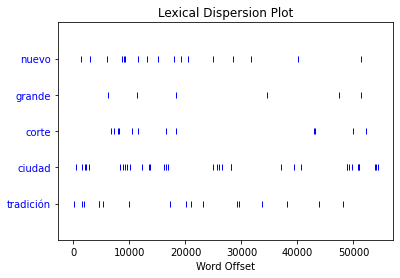

In [24]:
text.dispersion_plot(["nuevo", "grande", "corte", "ciudad", "tradición"])

Es posible que desees probar con más palabras y diferentes textos. ¿Puedes predecir la dispersión de una palabra antes de verla? Como antes, asegúrate de que las comillas, las comas, los corchetes y los paréntesis sean exactamente correctos.

Si tienes tiempo, te invito a revisar los tres primeros capítulos del libro del libro [Natural Language Processing with Python – Analyzing Text with the Natural Language Toolkit](https://www.nltk.org/book/).

Además, puedes revisar el API de [Reddit](https://towardsdatascience.com/how-to-use-the-reddit-api-in-python-5e05ddfd1e5c). 